# Confusion Matrix Exercise (Practice)
- **Student:** Michael McCann
- **Date:** 08 MAR 2022

## Setup -Mount Drive, Import Libraries and Data

In [1]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler #, OneHotEncoder
# from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression #,LinearRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier #, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier #, BaggingRegressor, RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')

In [3]:
## Load and Inspect the Data
cancer_filepath = '/content/drive/MyDrive/Data/wisconsinBreastCancer.csv'
can_df = pd.read_csv(cancer_filepath)


In [4]:
can_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
## No Duplicates or NAs
print(f"Number of NAs: {can_df.isna().sum().sum()}")
print(f"Number of Duplicates: {can_df.duplicated().sum()}")

Number of NAs: 569
Number of Duplicates: 0


In [6]:
y = can_df['diagnosis']
X = can_df.drop(columns = ['diagnosis', 'id', 'Unnamed: 32'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## Classification Decision Tree

In [13]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

preds = dec_tree.predict(X_test)

In [8]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(f'Decision Tree Train Score: {train_score}')
print(f'Decision Tree Test Score: {test_score}')

Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.951048951048951


In [16]:
cm = confusion_matrix(y_test.values, preds)
cm

array([[85,  4],
       [ 3, 51]])

In [18]:
tn, fp, fn, tp = cm.ravel()

print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')
print(f'\nAccuracy: {(tp+tn)/(tp+tn+fp+fn):.3f}')

True Positive: 51
True Negative: 85
False Positive: 4
False Negative: 3

Accuracy: 0.951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


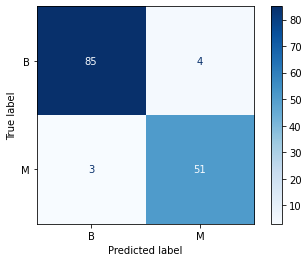

In [20]:
plot_confusion_matrix(dec_tree, X_test, y_test, cmap = 'Blues');

## Classification Bagged Tree

In [9]:
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [10]:
train_score = bag.score(X_train, y_train)
test_score = bag.score(X_test, y_test)

print(f'Bagged Tree Train Score: {train_score}')
print(f'Bagged Tree Test Score: {test_score}')

Bagged Tree Train Score: 0.9929577464788732
Bagged Tree Test Score: 0.951048951048951


## Classification Random Forest

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f'Random Forest Train Score: {train_score}')
print(f'Random Forest Test Score: {test_score}')

Random Forest Train Score: 1.0
Random Forest Test Score: 0.965034965034965
